# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.cluster import KMeans                          # K Means
#from sklearn.cluster import AgglomerativeClustering         # Hierarchical Agglomerative Clustering
from sklearn.decomposition import PCA                       # Principal Components Analysis
from sklearn.decomposition import KernelPCA                 # PCA Kernel
#from sklearn.decomposition import NMF                       # Non-negative Matrix Factorization
from sklearn.cluster import DBSCAN                          # DBSCAN
#from sklearn.manifold import TSNE                           # TSNE
from sklearn.mixture import GaussianMixture                 # GMM
from sklearn.cluster import MeanShift, estimate_bandwidth   # Mean shift
#from sklearn.manifold import MDS                            # Multi-Dimensional Scaling

#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

#from sklearn.decomposition import TruncatedSVD
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # count words
#from sklearn.preprocessing import scale
#from sklearn.utils import shuffle
#from sklearn.model_selection import StratifiedShuffleSplit
#from sklearn.model_selection import GridSearchCV
#from sklearn.preprocessing import FunctionTransformer
#from sklearn.pipeline import Pipeline


In [2]:
data = pd.read_csv("soil.csv")

# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   673 non-null    object 
 1   Zn %       658 non-null    float64
 2   Fe%        655 non-null    float64
 3   Cu %       651 non-null    float64
 4   Mn %       651 non-null    float64
 5   B %        608 non-null    float64
 6   S %        663 non-null    float64
dtypes: float64(6), object(1)
memory usage: 36.9+ KB


In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 0 to 672
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   600 non-null    object 
 1   Zn %       600 non-null    float64
 2   Fe%        600 non-null    float64
 3   Cu %       600 non-null    float64
 4   Mn %       600 non-null    float64
 5   B %        600 non-null    float64
 6   S %        600 non-null    float64
dtypes: float64(6), object(1)
memory usage: 37.5+ KB


In [6]:
data[data.duplicated(subset=['District '], keep=False)]

,District,Zn %,Fe%,Cu %,Mn %,B %,S %
68,Aurangabad,98.48,98.59,99.00,98.54,0.43,0.37
106,Balrampur,88.95,98.74,99.88,97.88,82.22,96.20
109,Bijapur,97.25,96.47,98.79,90.82,88.09,94.71
110,Bilaspur,74.54,96.48,98.45,93.32,86.97,88.01
187,Bilaspur,67.45,92.95,99.71,84.70,99.83,99.77
189,Hamirpur,92.80,86.04,90.88,89.18,96.23,87.97
248,Bijapur,19.36,6.96,93.39,77.45,59.04,10.37
342,Aurangabad,28.16,17.04,98.49,86.72,41.61,93.80
591,Balrampur,97.02,94.00,98.63,97.76,54.41,84.91
613,Hamirpur,66.38,67.04,94.59,79.97,3.08,73.13


In [7]:
data = data.drop([68, 106,109,110,189 ]).reset_index(drop=True)

In [8]:
data[data.duplicated(subset=['District '], keep=False)]

,District,Zn %,Fe%,Cu %,Mn %,B %,S %


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   District   595 non-null    object 
 1   Zn %       595 non-null    float64
 2   Fe%        595 non-null    float64
 3   Cu %       595 non-null    float64
 4   Mn %       595 non-null    float64
 5   B %        595 non-null    float64
 6   S %        595 non-null    float64
dtypes: float64(6), object(1)
memory usage: 32.7+ KB


In [10]:
col_object = data.columns[data.dtypes == "object"].tolist()
col_num = data.columns[(data.dtypes == "int64") | (data.dtypes == "float64")].tolist()

In [11]:
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

#for column, ax in zip(col_object, axes.ravel()):
#    sns.countplot(x=column, data=data, ax=ax, orient="x", order=data[column].value_counts().index)
#    ax.set_title(f'{column}', fontsize=12)
#    ax.tick_params(axis='x', rotation=90, labelsize=9)
#plt.subplots_adjust(hspace=0.4, wspace=0.3)
#plt.show()

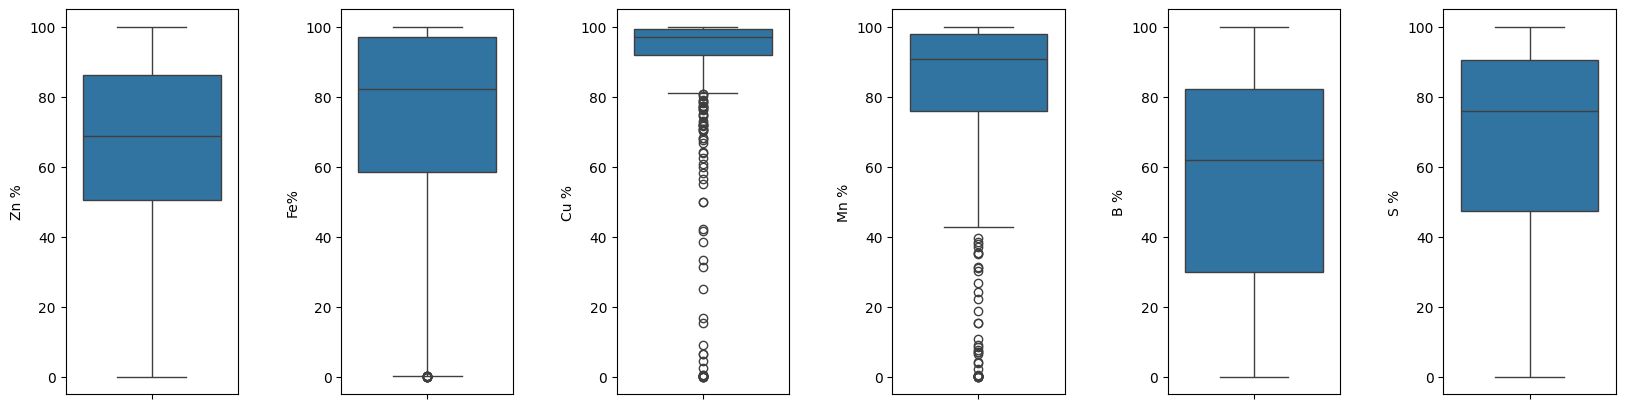

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=len(col_num), figsize=(20,5))

for colum, ax in zip(col_num, axes.ravel()):
    sns.boxplot(data=data[colum], ax=ax)
    #sns.histplot(data.iloc[:,colum], kde=True, ax=ax, bins=20)
    #ax.set_title(f'{colum}', fontsize=12)

plt.subplots_adjust(hspace=0.4, wspace=0.6)

In [13]:
def outliers(colum,bound):

    # Calculate IQR
    Q1 = data[colum].quantile(0.25)
    Q3 = data[colum].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - bound * IQR
    upper_bound = Q3 + bound * IQR

    # Identify outliers
    outlier = data[(data[colum] < lower_bound) | (data[colum] > upper_bound)]

    return pd.DataFrame(outlier)

In [109]:
outliers("Cu %", 20)

,District,Zn %,Fe%,Cu %,Mn %,B %,S %


In [110]:
#data = data.drop(110).reset_index(drop=True)

In [14]:
#fig, axes = plt.subplots(nrows=1, ncols=len(col_num), figsize=(20,5))

#for colum, ax in zip(col_num, axes.ravel()):
#    sns.boxplot(data=data[colum], ax=ax)
    #sns.histplot(data.iloc[:,colum], kde=True, ax=ax, bins=20)
    #ax.set_title(f'{colum}', fontsize=12)

#plt.subplots_adjust(hspace=0.4, wspace=0.6)

# Encoded and transform

In [15]:
#encod = OneHotEncoder(drop=None, sparse_output=False)
#encoded_df = encod.fit_transform(data[col_object])
#encoded_df = pd.DataFrame(encoded_df, columns=encod.get_feature_names_out(col_object))
#data_encoded = pd.concat([data.drop(col_object, axis=1), encoded_df], axis=1)

In [12]:
X = data[col_num].copy()

In [13]:
scal = StandardScaler()
scale_df = scal.fit_transform(data[col_num])
X[col_num] = scale_df

In [14]:
X.shape

(595, 6)

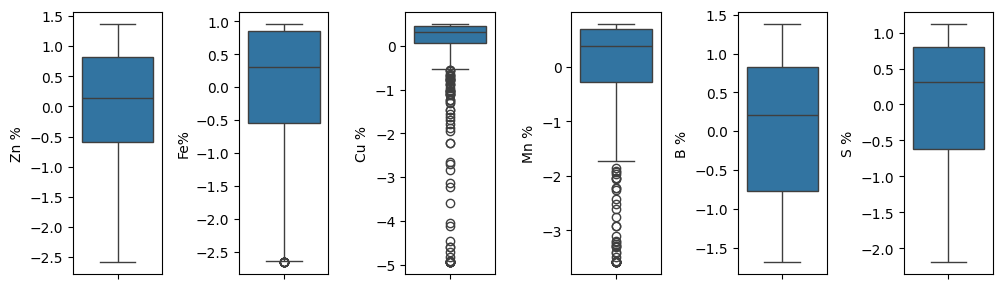

In [234]:
fig, axes = plt.subplots(nrows=1, ncols=len(col_num), figsize=(10,3))

for colum, ax in zip(col_num, axes.ravel()):
    sns.boxplot(data=X[colum], ax=ax)

plt.subplots_adjust(hspace=0.4, wspace=0.6)
plt.tight_layout(w_pad=1)
plt.savefig("./images/col_boxplot.png", bbox_inches='tight')

In [39]:
pickle.dump(scal, open("scaler.pkl", "wb"))

# PCA

In [17]:
pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models
for n in range(1, 7):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(X)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 
                               'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': X.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))


In [18]:
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

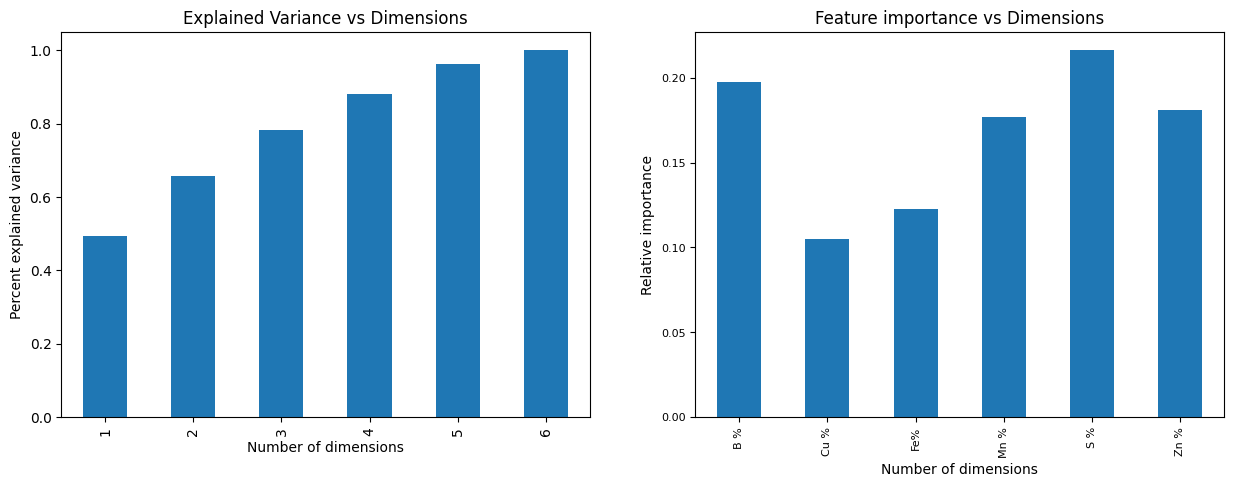

In [24]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
#sns.set_context('talk')
pca_df['var'].plot(kind='bar', ax=ax[0])

ax[0].set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions')
#plt.show()

features_df.iloc[3,:].plot(kind='bar',  ax=ax[1])
#ax.legend(loc='upper right')
ax[1].set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions')
ax[1].tick_params(labelsize=8)
#plt.show()
plt.savefig("./images/pca.png", pad_inches='tight')

In [ ]:

#pca_data = PCAmod.transform(X)
#df_pca = {}
#for i in range(6):
#    df_pca['col_'+str(i)] = pca_data[:,i]
#df_pca = pd.DataFrame(df_pca)
#inertia = []
#list_num_clusters = list(range(1,20))
#for num_clusters in list_num_clusters:
#    km = KMeans(n_clusters=num_clusters)
#    km.fit(df_pca)
#    inertia.append(km.inertia_)
    
#plt.plot(list_num_clusters,inertia)
#plt.scatter(list_num_clusters,inertia)
#plt.xlabel('Number of Clusters')
#plt.ylabel('Inertia')
#plt.show()
#data_encoded.to_csv("data_encoded.csv", index=False)
#data_copy.to_csv("data_copy.csv", index=False)
#df_pca.to_csv("data_pca.csv", index=False)

# PCA Kernel

In [25]:
kernel_pca = KernelPCA(n_components=15, 
                       kernel="rbf", 
                       gamma=10, 
                       fit_inverse_transform=True, 
                       alpha=0.1)

kernel_pca.fit(X)
X_pca_kernel = kernel_pca.transform(X)

df_pca_kernel = {}
for i in range(X_pca_kernel.shape[1]):
    df_pca_kernel['col_'+str(i)] = X_pca_kernel[:,i]
X_pca_kernel = pd.DataFrame(df_pca_kernel)

In [26]:
X_pca_kernel.shape

(595, 15)

In [40]:
pickle.dump(kernel_pca, open("kernel_pca.pkl","wb"))

# KMeansClustering

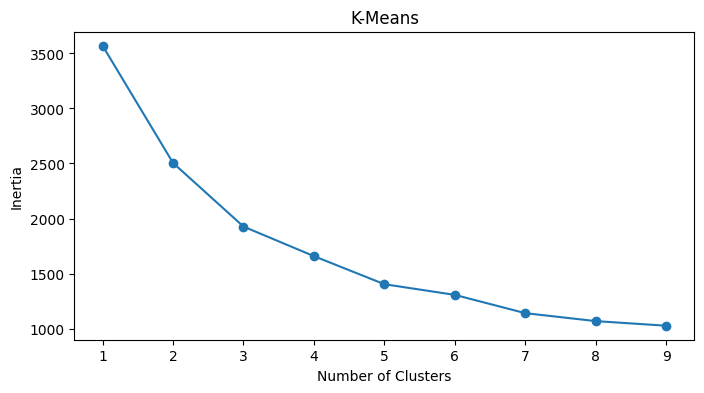

In [183]:
inertia = []
list_num_clusters = list(range(1,10))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title("K-Means")
plt.savefig("./images/kmeans.png")
plt.show()

In [28]:
km = KMeans(n_clusters=4, 
            init="k-means++", 
            max_iter=1000, 
            random_state=24)

km.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=24)

In [29]:
pickle.dump( km, open("km.pkl", "wb"))

In [30]:
data_copy = data.copy()

In [31]:
data_copy['labels_KM'] = km.labels_

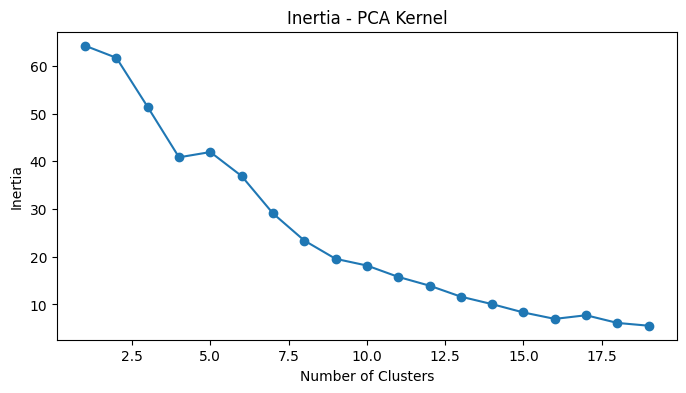

In [181]:
inertia = []
list_num_clusters = list(range(1,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_pca_kernel)
    inertia.append(km.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia - PCA Kernel')
plt.savefig("./images/kmeans_pca.png")
plt.show()

In [35]:
km_pca = KMeans(n_clusters=4)
km_pca.fit(X_pca_kernel)

KMeans(n_clusters=4)

In [36]:
data_copy["labels_KM_pca"] = km_pca.labels_

In [37]:
pickle.dump( km_pca, open("km_pca.pkl", "wb"))

# DBSCAN

In [201]:
eps_values = [0.04]#[0.01,0.02,0.03, 0.04, 0.05, 0.06, 0.07]#eps_values = np.arange(0.01,0.2, 0.01)#np.arange(0.01,0.2, 0.01)
#metrics = ['cosine', 'euclidean', 'manhattan']
samples = np.arange(2,10)
results = {"n_cluster":[],
           "scores":[],
           "par":[],
           "item":[]
           }

# Loop through each combination of eps and metric
i=0
for eps in eps_values:
    for sample in samples:
        cluster = DBSCAN(eps=eps, min_samples=sample, metric="euclidean")
        labels = cluster.fit_predict(X)

        if len(set(labels)) > 1 and len(set(labels)) < len(X):
            score = calinski_harabasz_score(X, labels)
            #score =silhouette_score(X, labels)
            i=i+1
            results["scores"].append(score)
            results["par"].append((eps, sample))
            results["item"].append(sample)
            results["n_cluster"].append(len(set(labels)))
        else:
            # Save a score of None if clustering didn't produce valid results
            results[(eps, sample)] = None

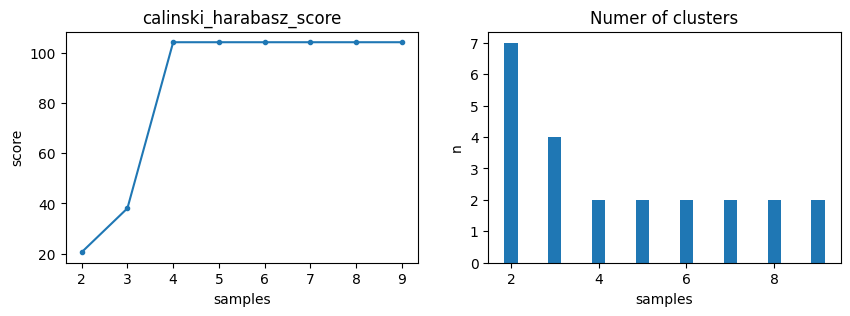

In [207]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
axes[0].plot(results["item"], results["scores"], ".-")
axes[0].set_title("calinski_harabasz_score")
axes[0].set_ylabel("score")
axes[0].set_xlabel("samples")

axes[1].bar(results["item"], results["n_cluster"], width=0.3)
axes[1].set_title("Numer of clusters")
axes[1].set_ylabel("n")
axes[1].set_xlabel("samples")

plt.savefig("./images/dbscan_metric_cluster.png", bbox_inches='tight')
plt.show()

In [224]:
cluster = DBSCAN(eps=0.04, min_samples=4, metric="euclidean")
labels = cluster.fit_predict(X)

In [225]:
set(cluster.labels_)

{np.int64(-1), np.int64(0)}

In [226]:
calinski_harabasz_score(X, cluster.labels_)

np.float64(104.36288084820522)

In [227]:
data_copy["labels_DBSCAN"] = cluster.labels_

# GMM

Text(0.5, 1.0, 'calinski_harabasz_score')

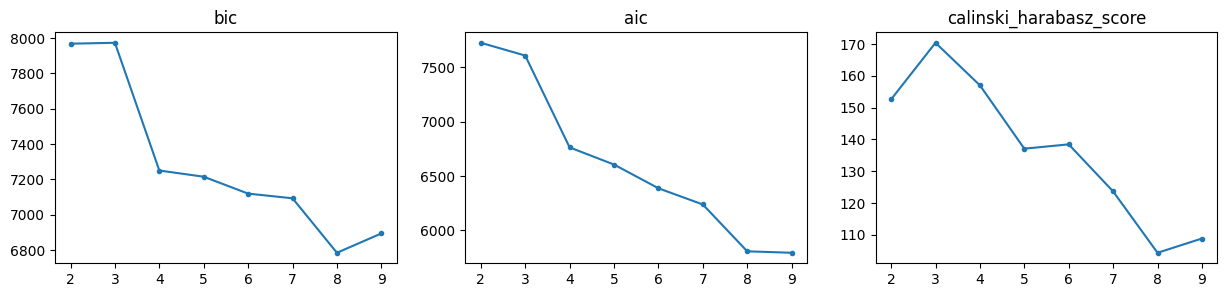

In [164]:
bic = []
aic = []
metric = []
n_components = range(2, 10)  # Test 1 to 10 clusters
for n in n_components:
    gmm = GaussianMixture(n_components=n).fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))
    metric.append(calinski_harabasz_score(X,gmm.predict(X)))

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,3))

axes[0].plot(n_components, bic, ".-")
axes[0].set_title("bic")
axes[1].plot(n_components, aic, ".-")
axes[1].set_title("aic")
axes[2].plot(n_components, metric, ".-")
axes[2].set_title("calinski_harabasz_score")

In [165]:
bic = []
aic = []
metric = []
n_components = range(2, 10)  # Test 1 to 10 clusters
for n in n_components:
    gmm = GaussianMixture(n_components=n).fit(X_pca_kernel)
    bic.append(gmm.bic(X_pca_kernel))
    aic.append(gmm.aic(X_pca_kernel))
    metric.append(calinski_harabasz_score(X,gmm.predict(X_pca_kernel)))

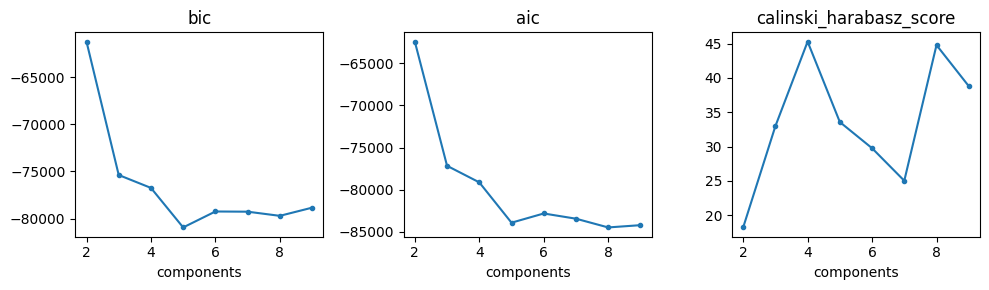

In [177]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10,3))

axes[0].plot(n_components, bic, ".-")
axes[0].set_title("bic")
axes[0].set_xlabel("components")
axes[1].plot(n_components, aic, ".-")
axes[1].set_title("aic")
axes[1].set_xlabel("components")
axes[2].plot(n_components, metric, ".-")
axes[2].set_title("calinski_harabasz_score")
axes[2].set_xlabel("components")

plt.tight_layout(h_pad=0.8)
plt.savefig("./images/gmm_kernel.png")

In [53]:
gmm = GaussianMixture(n_components=4).fit(X_pca_kernel)

In [54]:
data_copy["labels_gmm"] = gmm.predict(X_pca_kernel)

In [55]:
pickle.dump(gmm, open("gmm_kernel.pkl", "wb"))

# Mean shift

In [187]:
bandwidths = np.linspace(1.8, 5, 15)
results = {"score":[],
           "n_cluster":[],
           "band":[]}

for band in bandwidths:
    cluster = MeanShift(bandwidth=band)
    labels = cluster.fit_predict(X)

    if len(set(labels)) > 1 and len(set(labels)) < len(X):
        score = calinski_harabasz_score(X, labels)
        #score =silhouette_score(X_pca_kernel, labels)
        results["score"].append(score)
        results["n_cluster"].append(len(set(labels)))
        results["band"].append(band)

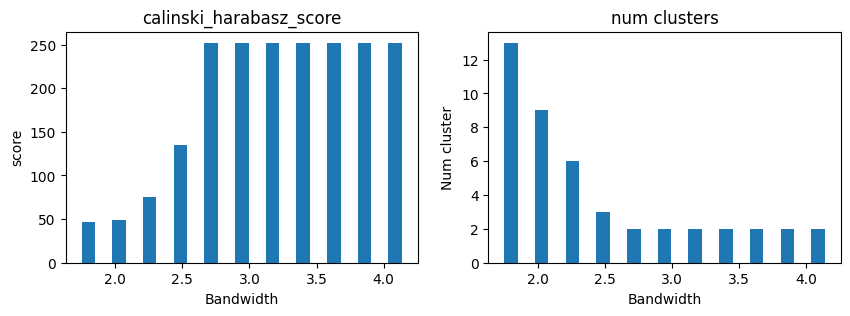

In [186]:
fig, axs = plt.subplots(nrows=1,ncols=2, figsize=(10,3))

axs[0].bar(results["band"], results["score"], width=0.1)
axs[0].set_xlabel("Bandwidth")
axs[0].set_ylabel("score")
axs[0].set_title("calinski_harabasz_score")

axs[1].bar(results["band"], results["n_cluster"], width=0.1)
axs[1].set_xlabel("Bandwidth")
axs[1].set_ylabel("Num cluster")
axs[1].set_title("num clusters")
plt.savefig("./images/MeanShift.png", bbox_inches='tight')
plt.show()

In [77]:
#bandwidth = estimate_bandwidth(X, quantile=.06, n_samples=3000)
#bandwidth 

In [196]:
ms = MeanShift(bandwidth=3, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=3, bin_seeding=True)

In [198]:
set(ms.labels_)

{np.int64(0), np.int64(1)}

In [199]:
data_copy["labels_ms"] = ms.labels_

In [80]:
pickle.dump(ms, open("meanshift.pkl", "wb"))

In [228]:
data_copy.to_csv("soil_labels_models.csv")